<a href="https://colab.research.google.com/github/Anna172/ML/blob/master/%D0%90%D0%94%D0%92%D0%91_%D0%94%D0%972_p1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [313]:
data_train = pd.read_csv("train.csv", delimiter=',',  parse_dates=['period_start_dt'])
data_train.tail()

,Unnamed: 0,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
35339,35537,40370,1380,2019-12-30,NaN,0.0,0.0,1000.00,1000.0,0.0,1.0
35340,35538,40372,1380,2019-12-30,NaN,0.0,0.0,2000.00,2000.0,0.0,1.0
35341,35539,40373,1380,2019-12-30,NaN,0.0,0.0,3000.00,3000.0,0.0,1.0
35342,35540,46272,1380,2019-12-30,NaN,1.0,0.0,284.29,199.0,0.0,1.0
35343,35541,96212,1380,2019-12-30,NaN,1.0,0.0,141.43,99.0,0.0,1.0


In [314]:
print(data_train[data_train['period_start_dt'].dt.year == 2020].shape[0])
print(data_train[ (data_train['period_start_dt'].dt.year == 2019) & (data_train['period_start_dt'].dt.month == 12) ].shape[0])
data_train.shape

0
1200


(35344, 11)

In [315]:
data_test = pd.read_csv("test.csv", delimiter=',',  parse_dates=['period_start_dt'])
data_test

,id,product_rk,store_location_rk,period_start_dt,demand
0,908,40369,317,2019-02-12,NaN
1,909,40370,317,2019-02-12,NaN
2,910,40372,317,2019-02-12,NaN
3,911,40373,317,2019-02-12,NaN
4,912,46272,317,2019-02-12,NaN
...,...,...,...,...,...
1399,35543,40370,1380,2020-06-01,NaN
1400,35544,40372,1380,2020-06-01,NaN
1401,35545,40373,1380,2020-06-01,NaN
1402,35546,46272,1380,2020-06-01,NaN


In [316]:
print(data_test[data_test['period_start_dt'].dt.year == 2020].shape[0])
print(data_test[ (data_test['period_start_dt'].dt.year == 2019) & (data_test['period_start_dt'].dt.month == 12) ].shape[0])
data_test.shape

204
720


(1404, 5)

In [317]:
data_test[ (data_test['period_start_dt'].dt.year == 2019) & (data_test['period_start_dt'].dt.month != 12) ]

,id,product_rk,store_location_rk,period_start_dt,demand
0,908,40369,317,2019-02-12,NaN
1,909,40370,317,2019-02-12,NaN
2,910,40372,317,2019-02-12,NaN
3,911,40373,317,2019-02-12,NaN
4,912,46272,317,2019-02-12,NaN
...,...,...,...,...,...
1375,35519,40370,1380,2019-09-12,NaN
1376,35520,40372,1380,2019-09-12,NaN
1377,35521,40373,1380,2019-09-12,NaN
1378,35522,46272,1380,2019-09-12,NaN


В тренировочном сете нет данных по 2020 году и в задании сказано, что нужно спрогнозировать только на декабрь 2019, поэтому удалим из тестового набора  данных все записи 20 года. 

Согласно заданию, нужно спрогнозировать только декабрь 2019 года, а в тестовом наборе данных 480 наблюдений не декабрь 2019 года, их тоже можно удалить.

В тренировочном наборе данных есть столбец без описания, возможно, это id. Проверим это предположение.

In [318]:
data_test = data_test[ (data_test['period_start_dt'].dt.year == 2019) & (data_test['period_start_dt'].dt.month == 12) ]
data_test.shape

(720, 5)

In [319]:
data_train['id'] = data_train['Unnamed: 0']
m = (data_train[(data_train['period_start_dt'].dt.year == 2019) & (data_train['period_start_dt'].dt.month == 12)].merge(data_test[(data_test['period_start_dt'].dt.year == 2019) & (data_test['period_start_dt'].dt.month == 12)], how='outer', on=['id','product_rk','store_location_rk', 'period_start_dt'], 
              suffixes=['', '_new'], indicator=True))
only2 = m[m['_merge']  == 'left_only']
only2

,Unnamed: 0,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,demand_new,_merge
0,908,40369,317,2019-12-02,NaN,0.0,0.0,500.00,500.0,0.0,1.0,908,NaN,left_only
1,909,40370,317,2019-12-02,NaN,0.0,0.0,1000.00,1000.0,0.0,1.0,909,NaN,left_only
2,910,40372,317,2019-12-02,NaN,0.0,0.0,2000.00,2000.0,0.0,1.0,910,NaN,left_only
3,911,40373,317,2019-12-02,NaN,0.0,0.0,3000.00,3000.0,0.0,1.0,911,NaN,left_only
4,912,46272,317,2019-12-02,NaN,1.0,0.0,284.29,199.0,0.0,1.0,912,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,35519,40370,1380,2019-12-09,NaN,0.0,0.0,1000.00,1000.0,0.0,1.0,35519,NaN,left_only
1178,35520,40372,1380,2019-12-09,NaN,0.0,0.0,2000.00,2000.0,0.0,1.0,35520,NaN,left_only
1179,35521,40373,1380,2019-12-09,NaN,0.0,0.0,3000.00,3000.0,0.0,1.0,35521,NaN,left_only
1180,35522,46272,1380,2019-12-09,NaN,1.0,0.0,284.29,199.0,0.0,1.0,35522,NaN,left_only


In [320]:
data_test[(data_test['period_start_dt'].dt.year == 2019) & (data_test['period_start_dt'].dt.month == 12) & (data_test['period_start_dt'].dt.day == 9)]

,id,product_rk,store_location_rk,period_start_dt,demand


In [321]:
data_train[(data_train['period_start_dt'].dt.year == 2019) & (data_train['period_start_dt'].dt.month == 12)]['period_start_dt'].unique()

array(['2019-12-02T00:00:00.000000000', '2019-12-09T00:00:00.000000000',
       '2019-12-16T00:00:00.000000000', '2019-12-23T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

В предложенном тестовом наборе данных отсутствуют записи за 2 и 9 число декабря. В тренировочном же есть все 5 недель декабря 2019 года и нет ничего лишнего. Соответственно, было решено работать только с тренировочным набором данных и потом уже из него получить тестовый сет. Поэтому переменнуем data_train в data

In [322]:
data = data_train

Предположение подтвердилось, все 720 id по продукту, магазину и дате совпали с предпологаемым id по продукту, магазину и дате в тренировочном сете, поэтому можно переименовать неизвестную колонку в id.

In [323]:
data = data.drop('id', axis=1)
data = data.rename(columns={'Unnamed: 0': 'id'})
print(data.shape)
data.tail()

(35344, 11)


,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
35339,35537,40370,1380,2019-12-30,NaN,0.0,0.0,1000.00,1000.0,0.0,1.0
35340,35538,40372,1380,2019-12-30,NaN,0.0,0.0,2000.00,2000.0,0.0,1.0
35341,35539,40373,1380,2019-12-30,NaN,0.0,0.0,3000.00,3000.0,0.0,1.0
35342,35540,46272,1380,2019-12-30,NaN,1.0,0.0,284.29,199.0,0.0,1.0
35343,35541,96212,1380,2019-12-30,NaN,1.0,0.0,141.43,99.0,0.0,1.0


По каждой переменной набора данных рассчитаем: число уникальных значений (UNIQUE и PERCENT_UNIQUE), число нудевых значений (ZEROS и PERCENT_ZEROS), число пропущенных значений (NANS и PERCENT_NANS) и тип данных (DATA_TYPE). Результаты приведены в таблице ниже:

In [324]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35344,100,1,0.00282933,0,0,int64
product_rk,6,0.016976,0,0,0,0,int64
store_location_rk,41,0.116003,0,0,0,0,int64
period_start_dt,159,0.449864,0,0,0,0,datetime64[ns]
demand,1807,5.11261,5454,15.4312,1200,3.3952,float64
PROMO1_FLAG,4,0.0113173,28323,80.1352,185,0.523427,float64
PROMO2_FLAG,2,0.00565867,35159,99.4766,185,0.523427,float64
PRICE_REGULAR,230,0.650747,0,0,1127,3.18866,float64
PRICE_AFTER_DISC,1037,2.93402,0,0,1132,3.20281,float64
NUM_CONSULTANT,2,0.00565867,35159,99.4766,185,0.523427,float64


Признак NUM_CONSULTANT практически на 100 процентов состоит из 0, следовательно, он не несет никакой информации и его можно удалить из набора данных. 

PROMO2_FLAG состоит только из 0 и пропущенных, так что его тоже можно удалить.

PROMO1_FLAG тоже в основном состоит из 0, но он может объяснить выбросы, так что эту переменную следует оставить.



In [325]:
data = data.drop('NUM_CONSULTANT', axis=1)
data = data.drop('PROMO2_FLAG', axis=1)
dt = dt.drop('NUM_CONSULTANT', axis=0)
dt = dt.drop('PROMO2_FLAG', axis=0)
data.shape

(35344, 9)

Далее посмотрим на demand. У нее остаточно много нулей, нужно понять, нормально ли это.

In [326]:
prod_list = data[data['demand'] == 0]['product_rk'].unique()
prod_list

array([46272, 40372, 96212, 40373, 40369, 40370])

In [327]:
for prod in prod_list:
  y= data[data['product_rk'] == prod].groupby('period_start_dt', as_index=False)['demand'].sum()
y

,period_start_dt,demand
0,2016-12-19,1736.000000
1,2016-12-26,3702.000000
2,2017-01-02,2443.529969
3,2017-01-09,590.000000
4,2017-01-16,512.797814
...,...,...
154,2019-12-02,0.000000
155,2019-12-09,0.000000
156,2019-12-16,0.000000
157,2019-12-23,0.000000


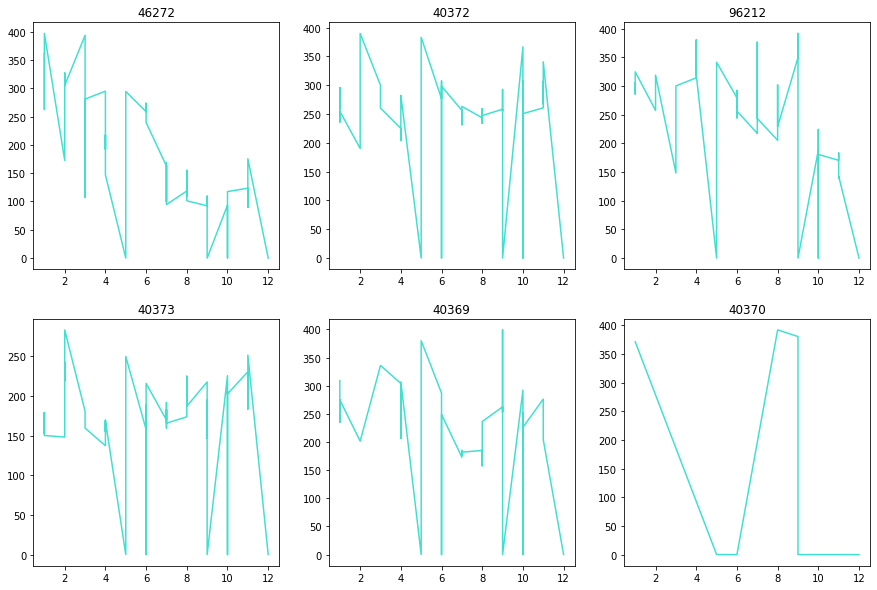

In [328]:
r = 2
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for prod in prod_list:
  y= data[(data['product_rk'] == prod) & (data['period_start_dt'].dt.year == 2019)].groupby('period_start_dt', as_index=False)['demand'].sum()
  y = y[y['demand']<400]
  if (i < r) & (j < c): 
    ax[i, j].plot(y['period_start_dt'].dt.month, y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  elif (i < r) & (j == c):
    j = 0
    i += 1
    ax[i, j].plot(y['period_start_dt'].dt.month, y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  else:
    print('ERROR')  
 
plt.show()

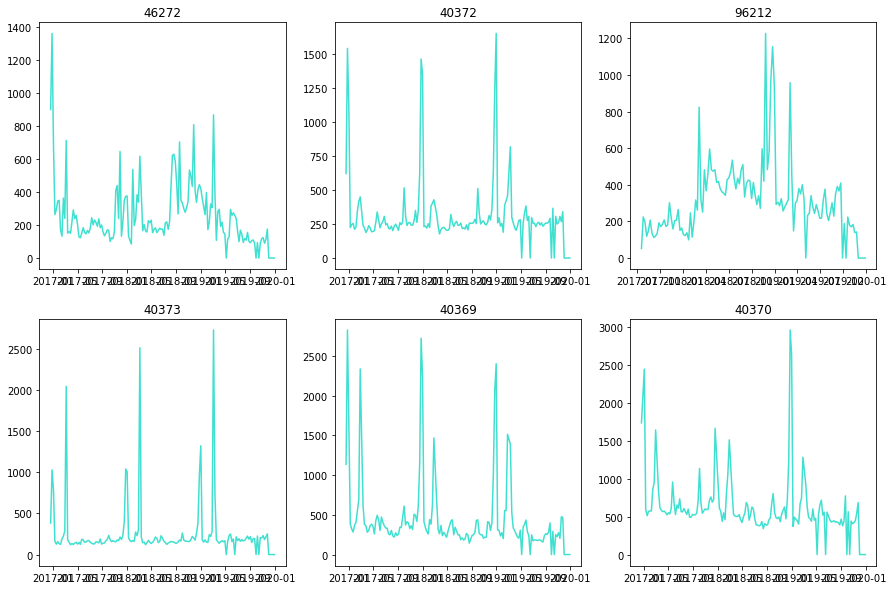

In [329]:
r = 2
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for prod in prod_list:
  y= data[(data['product_rk'] == prod) ].groupby('period_start_dt', as_index=False)['demand'].sum()
  y = y[y['demand']<3000]
  if (i < r) & (j < c): 
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  elif (i < r) & (j == c):
    j = 0
    i += 1
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  else:
    print('ERROR')  
 
plt.show()

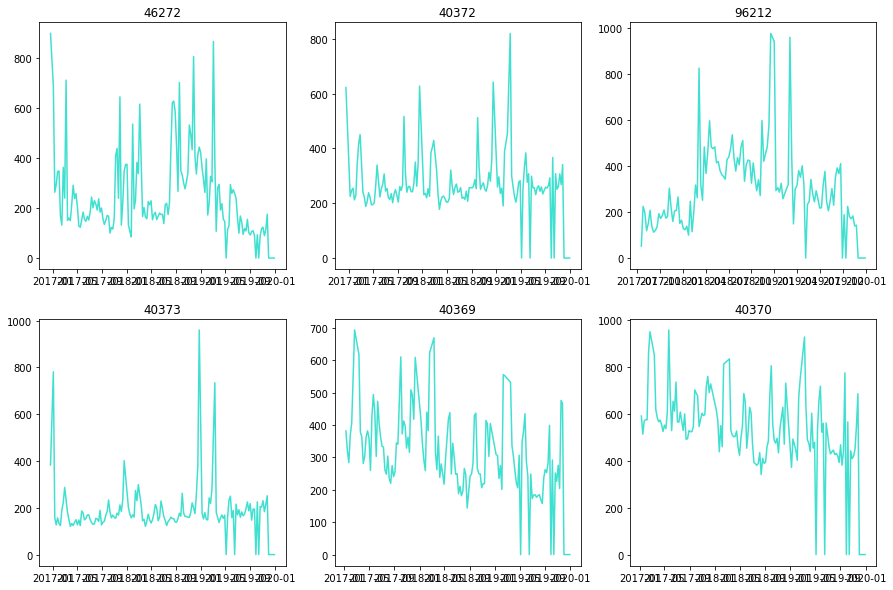

{40369: 307.4636600349653,
 40370: 519.247791140845,
 40372: 263.80649512666645,
 40373: 181.8735214342104,
 46272: 248.10640677848093,
 96212: 298.6593751653543}

In [330]:
r = 2
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))
means = {}

i = 0
j = 0

for prod in prod_list:
  y= data[(data['product_rk'] == prod) ].groupby('period_start_dt', as_index=False)['demand'].sum()
  y = y[y['demand']<1000]
  if (i < r) & (j < c): 
    means[prod] = y['demand'].mean()
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  elif (i < r) & (j == c):
    j = 0
    i += 1
    means[prod] = y['demand'].mean()
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  else:
    print('ERROR')  
 
plt.show()
means

Наблюдаются какие-то совершенно непонятные нули в 2019 году. Скорее всего это ошибки в данных и они будут мешать построению модели, поэтому их нужно заменить. Так как в данных есть выбросы, среднее сильно на них реагирует, поэтому заменим 0 средним значением без учета выбросов.

In [331]:
for i in data.index:

  for key, value in means.items():
    value = np.float64(value)

    if (data.loc[i,'product_rk'] == key) & (data.loc[i, 'demand'] == 0):
      data.loc[i, 'demand'] = value
      i += 1
      break

data

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG
0,0,40369,309,2016-12-19,29.0,NaN,NaN,NaN,NaN
1,1,40370,309,2016-12-19,64.0,NaN,NaN,NaN,NaN
2,2,40372,309,2016-12-19,32.0,NaN,NaN,NaN,NaN
3,3,40373,309,2016-12-19,10.0,NaN,NaN,NaN,NaN
4,4,46272,309,2016-12-19,15.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35339,35537,40370,1380,2019-12-30,NaN,0.0,1000.00,1000.0,1.0
35340,35538,40372,1380,2019-12-30,NaN,0.0,2000.00,2000.0,1.0
35341,35539,40373,1380,2019-12-30,NaN,0.0,3000.00,3000.0,1.0
35342,35540,46272,1380,2019-12-30,NaN,1.0,284.29,199.0,1.0


Посмотрим, как изменилась картина по нулевым значениям спроса:

In [332]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35344,100,1,0.00282933,0,0,int64
product_rk,6,0.016976,0,0,0,0,int64
store_location_rk,41,0.116003,0,0,0,0,int64
period_start_dt,159,0.449864,0,0,0,0,datetime64[ns]
demand,1812,5.12675,0,0,1200,3.3952,float64
PROMO1_FLAG,4,0.0113173,28323,80.1352,185,0.523427,float64
PRICE_REGULAR,230,0.650747,0,0,1127,3.18866,float64
PRICE_AFTER_DISC,1037,2.93402,0,0,1132,3.20281,float64
AUTORIZATION_FLAG,3,0.008488,3246,9.18402,185,0.523427,float64


Все, в перепенной demand не осталось странных нулевых значений, а пропущенные значения в нем, как выяснилось ранее - это как раз то, что нам нужно предсказать.

Далее нужно разобраться с пропущенными значениями переменной PROCE_REGULAR. Их хоть и не много в процентном соотношении, однако они могут быть в декабре, а это значимые наблюдения, если наблюдается цикличность.

In [333]:
data[data['PRICE_REGULAR'].isnull() ]


,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG
0,0,40369,309,2016-12-19,29.000000,NaN,NaN,NaN,NaN
1,1,40370,309,2016-12-19,64.000000,NaN,NaN,NaN,NaN
2,2,40372,309,2016-12-19,32.000000,NaN,NaN,NaN,NaN
3,3,40373,309,2016-12-19,10.000000,NaN,NaN,NaN,NaN
4,4,46272,309,2016-12-19,15.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30477,30640,40373,1281,2016-12-19,46.000000,NaN,NaN,NaN,NaN
30478,30641,46272,1281,2016-12-19,55.000000,NaN,NaN,NaN,NaN
35019,35217,40369,1380,2018-12-17,307.463660,0.0,NaN,NaN,0.0
35021,35219,40372,1380,2018-12-17,263.806495,0.0,NaN,NaN,0.0


In [334]:
data['AUTORIZATION_FLAG'].unique()


array([nan,  1.,  0.])

Так оно и есть, пропуски выпали на декабрь 16 года. 

Так как промо на нашем наборе данных не популярны и по большей части состоят из 0, пропущенныезначения по этой переменной можно смело заменять  на 0. Переменная AUTORIZATION_FLAG состоит в основном из 1, так что заменим пропуски на 1. Так как считаем, что промо не было, то запишем PRICE_AFTER_DISC равной PRICE_REGULAR.

Остается понять, как заполнить PRICE_REGULAR.

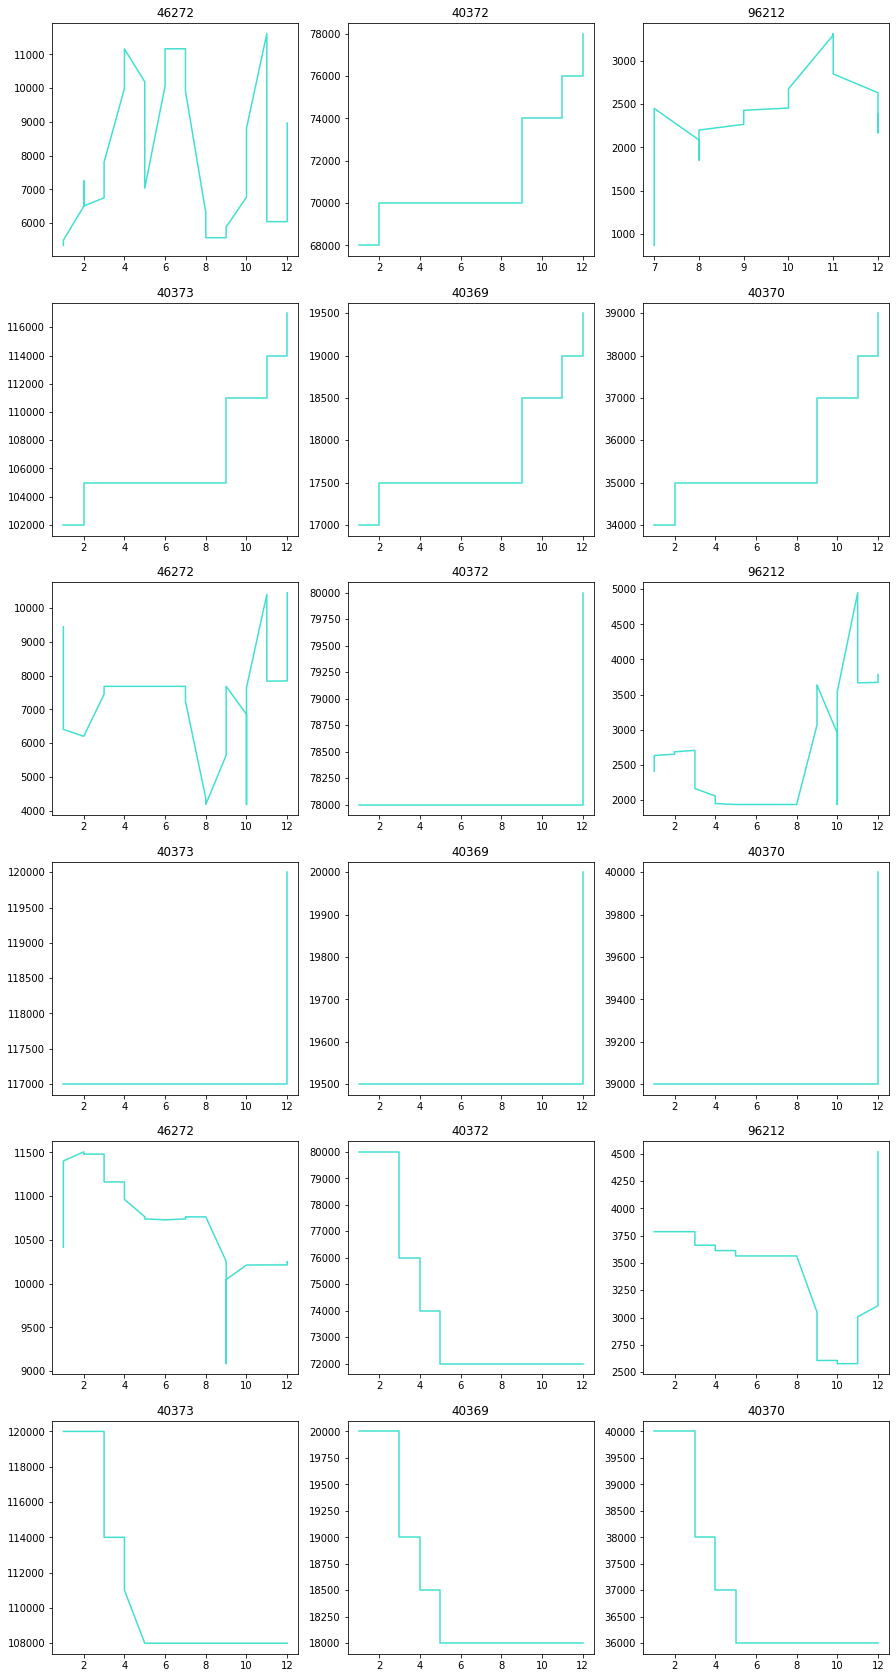

In [335]:
r = 6
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))
#means = {}

i = 0
j = 0

year = [2017, 2018, 2019]

for yr in range(len(year)):
  for prod in prod_list:
    y= data[(data['product_rk'] == prod) & (data['period_start_dt'].dt.year == year[yr]) ].groupby('period_start_dt', as_index=False)['PRICE_REGULAR'].sum()
    #y = y[y['demand']<1000]
    if (i < r) & (j < c): 
  #   means[prod] = y['demand'].mean()
      ax[i, j].plot(y['period_start_dt'].dt.month, y['PRICE_REGULAR'], color = 'turquoise')
      ax[i, j].set_title(prod)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
  #   means[prod] = y['demand'].mean()
      ax[i, j].plot(y['period_start_dt'].dt.month, y['PRICE_REGULAR'], color = 'turquoise')
      ax[i, j].set_title(prod)
      j += 1
    else:
      print('ERROR')  
    
  yr += 1
 
plt.show()
#means

Согласно графикам, значения декабря практически по каждому товару всегда примерно равно значениям января. В 2019 году с ценами происходит что-то странное. Заполним ропуски цен в 2016 году январем 2017.


In [336]:
data[(data['period_start_dt'] == '2017-01-09')&(data['PRICE_REGULAR'].isnull())]

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG


In [337]:
for i in data[data['period_start_dt'].dt.year == 2016].index:
  if (str(data.loc[i,'PRICE_REGULAR']) == 'nan'):
    v = data[(data['store_location_rk'] == data.loc[i,'store_location_rk']) & (data['product_rk'] == data.loc[i,'product_rk']) & (data['period_start_dt'] == '2017-01-02')]['PRICE_REGULAR'].tolist()[0]
    if (str(v) == 'nan'):
      data.loc[i,'PRICE_REGULAR'] = v
    else:
      data.loc[i,'PRICE_REGULAR'] = data[(data['store_location_rk'] == data.loc[i,'store_location_rk']) & (data['product_rk'] == data.loc[i,'product_rk']) & (data['period_start_dt'] == '2017-01-09')]['PRICE_REGULAR'].tolist()[0]





Посмотрим, что получилось:


In [338]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35344,100,1,0.00282933,0,0,int64
product_rk,6,0.016976,0,0,0,0,int64
store_location_rk,41,0.116003,0,0,0,0,int64
period_start_dt,159,0.449864,0,0,0,0,datetime64[ns]
demand,1812,5.12675,0,0,1200,3.3952,float64
PROMO1_FLAG,4,0.0113173,28323,80.1352,185,0.523427,float64
PRICE_REGULAR,230,0.650747,0,0,957,2.70767,float64
PRICE_AFTER_DISC,1037,2.93402,0,0,1132,3.20281,float64
AUTORIZATION_FLAG,3,0.008488,3246,9.18402,185,0.523427,float64


In [339]:
data19 = data[data['period_start_dt'].dt.year == 2019]
data18 = data[data['period_start_dt'].dt.year == 2018]
data17 = data[data['period_start_dt'].dt.year == 2017]
    

In [340]:
me = (data19.merge(data17, how='outer', on=['product_rk','store_location_rk'], 
              suffixes=['', '_new'], indicator=True))
only2 = me[me['_merge']  == 'right_only']
only2

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,id_new,period_start_dt_new,demand_new,PROMO1_FLAG_new,PRICE_REGULAR_new,PRICE_AFTER_DISC_new,AUTORIZATION_FLAG_new,_merge
525198,NaN,40369,309,NaT,NaN,NaN,NaN,NaN,NaN,10.0,2017-01-02,50.0,NaN,NaN,NaN,NaN,right_only
525199,NaN,40370,309,NaT,NaN,NaN,NaN,NaN,NaN,11.0,2017-01-02,70.0,NaN,NaN,NaN,NaN,right_only
525200,NaN,40372,309,NaT,NaN,NaN,NaN,NaN,NaN,12.0,2017-01-02,30.0,NaN,NaN,NaN,NaN,right_only
525201,NaN,40373,309,NaT,NaN,NaN,NaN,NaN,NaN,13.0,2017-01-02,42.0,NaN,NaN,NaN,NaN,right_only
525202,NaN,46272,309,NaT,NaN,NaN,NaN,NaN,NaN,14.0,2017-01-02,13.0,NaN,NaN,NaN,NaN,right_only


In [341]:
data[(data['store_location_rk'] == 309)   ].tail()

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG
10,10,40369,309,2017-01-02,50.0,NaN,NaN,NaN,NaN
11,11,40370,309,2017-01-02,70.0,NaN,NaN,NaN,NaN
12,12,40372,309,2017-01-02,30.0,NaN,NaN,NaN,NaN
13,13,40373,309,2017-01-02,42.0,NaN,NaN,NaN,NaN
14,14,46272,309,2017-01-02,13.0,NaN,NaN,NaN,NaN


309 магазина нет в 2019 году, его можно удалить из выборки.


In [342]:
data = data[(data['store_location_rk'] != 309)  ]
data.shape

(35329, 9)

In [343]:
me = (data19.merge(data18, how='outer', on=['product_rk','store_location_rk'], 
              suffixes=['', '_new'], indicator=True))
only2 = me[me['_merge']  == 'right_only']
only2

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,id_new,period_start_dt_new,demand_new,PROMO1_FLAG_new,PRICE_REGULAR_new,PRICE_AFTER_DISC_new,AUTORIZATION_FLAG_new,_merge


In [344]:
me = (data19.merge(data18, how='outer', on=['product_rk','store_location_rk'], 
              suffixes=['', '_new'], indicator=True))
only2 = me[me['_merge']  == 'left_only']
only2.head()

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,id_new,period_start_dt_new,demand_new,PROMO1_FLAG_new,PRICE_REGULAR_new,PRICE_AFTER_DISC_new,AUTORIZATION_FLAG_new,_merge
645684,35246,46272,1380,2019-01-21,3.0,1.0,299.0,149.5,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,left_only
645685,35252,46272,1380,2019-01-28,13.0,1.0,299.0,149.5,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,left_only
645686,35258,46272,1380,2019-02-04,1.0,1.0,299.0,149.5,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,left_only
645687,35264,46272,1380,2019-02-11,11.0,1.0,299.0,149.5,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,left_only
645688,35270,46272,1380,2019-02-18,3.0,1.0,299.0,149.5,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,left_only


Продукт 46272, появился в магазине 1380 только в 2019 гоу, точность его предсказания будет невелика. Нужно смотреть, как он торгуется в соседних магазинах. 

In [345]:
data[data['PRICE_REGULAR'].isnull()]

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG
8087,8133,40369,533,2019-04-08,307.463660,0.0,NaN,NaN,0.0
8093,8139,40369,533,2019-04-15,307.463660,0.0,NaN,NaN,0.0
8094,8140,40370,533,2019-04-15,519.247791,0.0,NaN,NaN,0.0
8095,8141,40372,533,2019-04-15,263.806495,0.0,NaN,NaN,0.0
8096,8142,40373,533,2019-04-15,181.873521,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
29550,29707,46272,1202,2019-12-30,NaN,0.0,NaN,NaN,0.0
29551,29708,96212,1202,2019-12-30,NaN,0.0,NaN,NaN,0.0
35019,35217,40369,1380,2018-12-17,307.463660,0.0,NaN,NaN,0.0
35021,35219,40372,1380,2018-12-17,263.806495,0.0,NaN,NaN,0.0


Осталось еще много незаполненных цен в 2019 году. Заполним их средним по предыдущему году.

In [346]:
for i in data[data['period_start_dt'].dt.year == 2019].index:
  if (str(data.loc[i,'PRICE_REGULAR']) == 'nan'):
    v = data[(data['store_location_rk'] == data.loc[i,'store_location_rk']) & (data['product_rk'] == data.loc[i,'product_rk']) & (data['period_start_dt'].dt.year == 2018)]['PRICE_REGULAR'].mean()
    if (str(v) == 'nan'):
      data.loc[i,'PRICE_REGULAR'] = v
    else:
      data.loc[i,'PRICE_REGULAR'] = data[(data['store_location_rk'] == data.loc[i,'store_location_rk']) & (data['product_rk'] == data.loc[i,'product_rk']) & (data['period_start_dt'].dt.year == 2019)]['PRICE_REGULAR'].mean()



Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-

In [347]:
#Проверка
data[data['PRICE_REGULAR'].isnull()]

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG
35019,35217,40369,1380,2018-12-17,307.463660,0.0,NaN,NaN,0.0
35021,35219,40372,1380,2018-12-17,263.806495,0.0,NaN,NaN,0.0
35022,35220,40373,1380,2018-12-17,181.873521,0.0,NaN,NaN,0.0


Осталось три записи с пропущенными ценами. Заполним их по той же схеме.

In [348]:
for i in data[data['period_start_dt'].dt.year == 2018].index:
  if (str(data.loc[i,'PRICE_REGULAR']) == 'nan'):
    data.loc[i,'PRICE_REGULAR'] = data[(data['store_location_rk'] == data.loc[i,'store_location_rk']) & (data['product_rk'] == data.loc[i,'product_rk']) & (data['period_start_dt'].dt.year == 2018)]['PRICE_REGULAR'].mean()



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [349]:
#Проверка
data[data['PRICE_REGULAR'].isnull()]

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG


Теперь можно заполнить все оставшиеся пропущенные поля


In [350]:
for i in data.index:
  if (str(data.loc[i,'PRICE_AFTER_DISC']) == 'nan'):
    data.loc[i,'PRICE_AFTER_DISC'] = data.loc[i,'PRICE_REGULAR']
  if (str(data.loc[i,'PROMO1_FLAG']) == 'nan'):
    data.loc[i,'PROMO1_FLAG'] = 0
  if (str(data.loc[i,'AUTORIZATION_FLAG']) == 'nan'):
    data.loc[i,'AUTORIZATION_FLAG'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Посмотрим, что имеем после всех изменений.

In [351]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35329,100,0,0,0,0,int64
product_rk,6,0.0169832,0,0,0,0,int64
store_location_rk,40,0.113221,0,0,0,0,int64
period_start_dt,159,0.450055,0,0,0,0,datetime64[ns]
demand,1811,5.1261,0,0,1200,3.39664,float64
PROMO1_FLAG,3,0.00849161,28493,80.6505,0,0,float64
PRICE_REGULAR,229,0.648193,0,0,0,0,float64
PRICE_AFTER_DISC,1036,2.93244,0,0,0,0,float64
AUTORIZATION_FLAG,2,0.00566107,3246,9.18792,0,0,float64


Проведем анализ описательных статистик по численным переменным набора данных:

In [352]:
columns = ["COUNT", 'MEAN', 'STD', 'MIN', '25%', '50%', '75%', 'MAX']
numeric_data = data.select_dtypes(include=np.number)
os = pd.DataFrame(index=numeric_data.columns, columns=columns)

for col in numeric_data.columns:
  os.loc[col,"COUNT"] = numeric_data[numeric_data[col] >= 0][col].count()
  os.loc[col,"MEAN"] = numeric_data[numeric_data[col] >= 0][col].mean()
  os.loc[col,"STD"] = numeric_data[numeric_data[col] >= 0][col].std()
  os.loc[col,"MIN"] = numeric_data[numeric_data[col] >= 0][col].min()
  os.loc[col,"25%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.25)
  os.loc[col,"50%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.50)
  os.loc[col,"75%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.75)
  os.loc[col,"MAX"] = numeric_data[numeric_data[col] >= 0][col].max()

os

,COUNT,MEAN,STD,MIN,25%,50%,75%,MAX
id,35329,17774.1,10253.7,15,8893,17778,26651,35541
product_rk,35329,49257,19148.4,40369,40370,40372,46272,96212
store_location_rk,35329,844.467,333.117,317,535,862,1173,1380
demand,34129,58.9658,113.311,0.033333,4,9,26,1160
PROMO1_FLAG,35329,0.20544,0.432585,0,0,0,0,2
PRICE_REGULAR,35329,1167.33,1047.24,49,284.29,1000,2000,3000
PRICE_AFTER_DISC,35329,1155.65,1057.98,8.64706,199,1000,2000,3000
AUTORIZATION_FLAG,35329,0.908121,0.288859,0,1,1,1,1


Анализ описательных статистик показал, что переменная demand, вероятно, имеет выбросы. Возможно, они связаны с промо или с другими драйверами. Это нужно будет изучить.

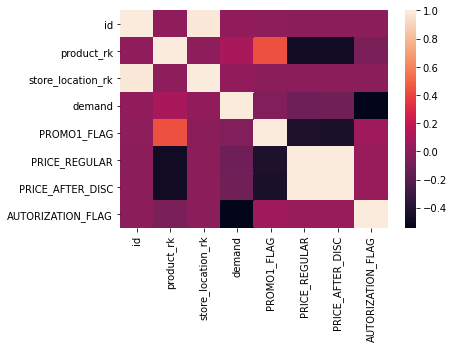

In [353]:
sns.heatmap(data.corr())

Карта показывает, что в основном, между переменными наблюдается низкая корреляция, а потому лиейно-регрессионный анализ в данном случае может быть неуместен.

Теперь нужно проанализировать спрос и цены на выбросы. Для этого построим разнообразные графики.

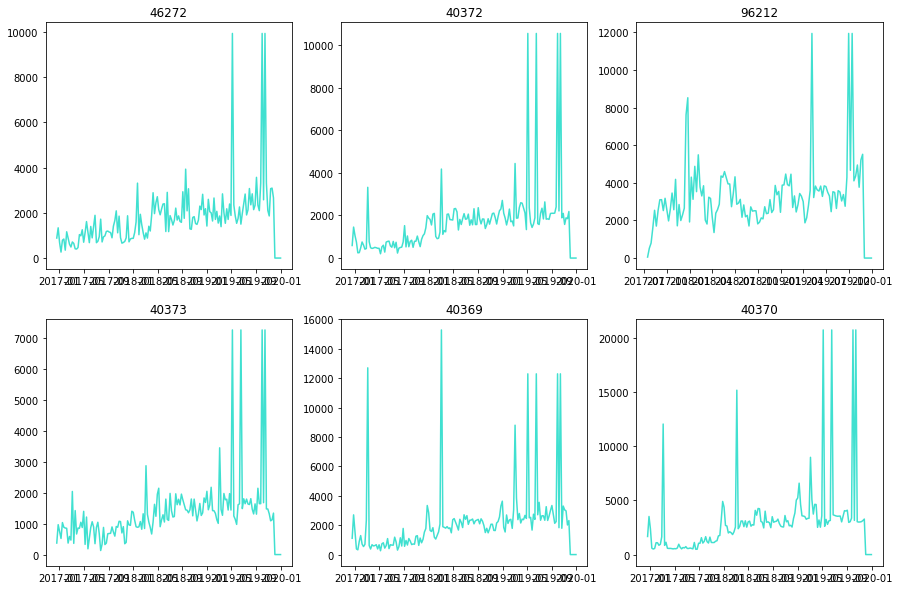

In [354]:
r = 2
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for prod in prod_list:
  y= data[(data['product_rk'] == prod) ].groupby('period_start_dt', as_index=False)['demand'].sum()
 # y = y[y['demand']<3000]
  if (i < r) & (j < c): 
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  elif (i < r) & (j == c):
    j = 0
    i += 1
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  else:
    print('ERROR')  
 
plt.show()

Выбросы в основном прихоятся на 2019 год и они существенные, скорее всего, это ошибка в данных. Проверим это.

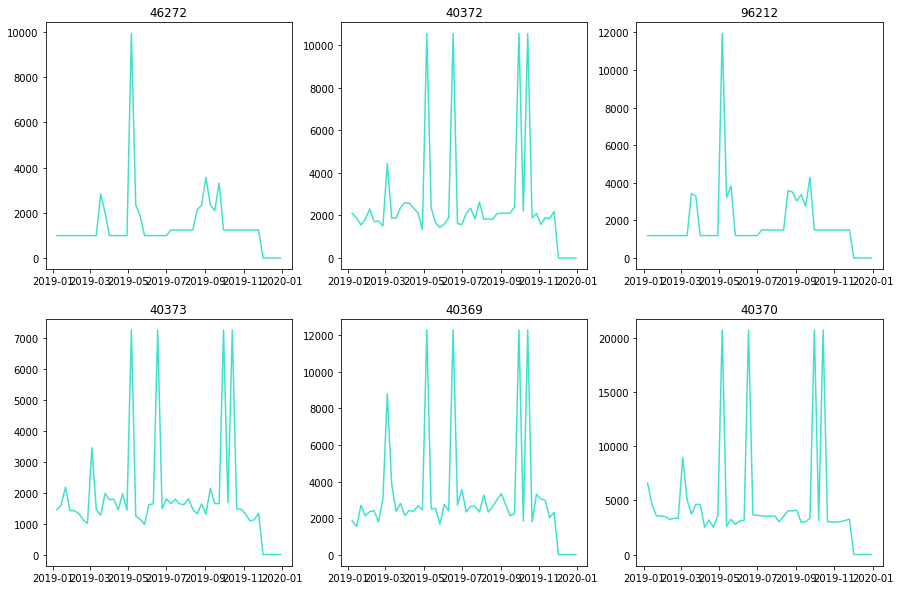

In [355]:
r = 2
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0
#'PROMO1_FLAG' 'AUTORIZATION_FLAG'  & (data['period_start_dt'].dt.month == 1) & (data['Month'] == 3)
for prod in prod_list:
  y= data[(data['product_rk'] == prod)  & (data['period_start_dt'].dt.year == 2019) & (data['PROMO1_FLAG'] == 0) ].groupby('period_start_dt', as_index=False)['demand'].sum()
 # y = y[y['demand']<3000]
  if (i < r) & (j < c): 
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  elif (i < r) & (j == c):
    j = 0
    i += 1
    ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
    ax[i, j].set_title(prod)
    j += 1
  else:
    print('ERROR')  
 
plt.show()

У выбросов одинаковый рисунок, скорее всего они чем-то обусловлены, однако, непонятно чем. Известные нам драйверы на это не влияют. Попробуем добавить такие колонки на месяц и номер недели по счету в месяце. 

Также следует изменить выбросы 2019 года на 75 перецентиль, потому что они принимают какие-то невероятные значения.

In [356]:
data['Month'] = data['period_start_dt'].dt.month
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month
15,15,40369,317,2016-12-19,50.0,0.0,500.0,500.0,1.0,12
16,16,40370,317,2016-12-19,44.0,0.0,1000.0,1000.0,1.0,12
17,17,40372,317,2016-12-19,13.0,0.0,2000.0,2000.0,1.0,12
18,18,40373,317,2016-12-19,6.0,0.0,3000.0,3000.0,1.0,12
19,19,46272,317,2016-12-19,34.0,0.0,157.0,157.0,1.0,12


In [357]:
data['Week'] = data['demand']

for i in data.index:
  if (0 < data.loc[i,'period_start_dt'].day < 8):
    data.loc[i,'Week'] = 1
    i += 1
  elif (7 < data.loc[i,'period_start_dt'].day < 15):
    data.loc[i,'Week'] = 2
    i += 1
  elif (14 < data.loc[i,'period_start_dt'].day < 22):
    data.loc[i,'Week'] = 3
    i += 1
  elif (22 < data.loc[i,'period_start_dt'].day < 29):
    data.loc[i,'Week'] = 4
    i += 1
  else:
    data.loc[i,'Week'] = 5
    i += 1

data['Week'].unique()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array([3., 4., 1., 2., 5.])

Объяснить выбросы новыми переменными не получилось, заменим их значением рамным сумме среднего и трех стандартных отклонений по данному продукту в анный год.

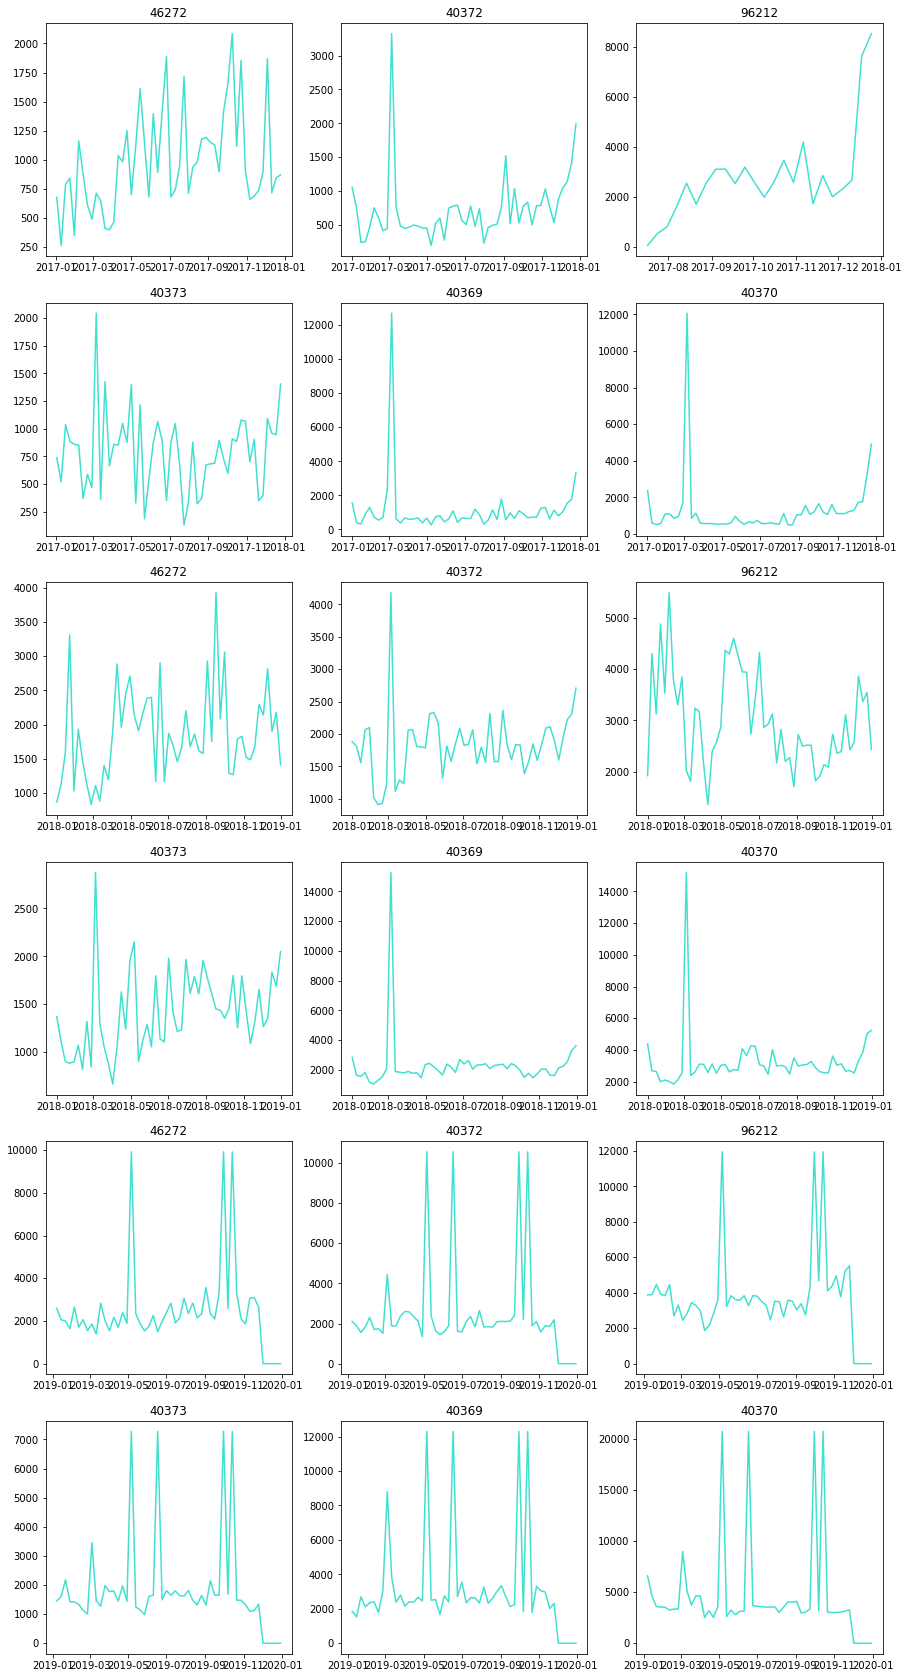

In [358]:
r = 6
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0
#'PROMO1_FLAG' 'AUTORIZATION_FLAG'  & (data['period_start_dt'].dt.month == 1) & (data['Month'] == 3)

year = [2017, 2018, 2019]

for yr in range(len(year)):
  for prod in prod_list:
    y= data[(data['product_rk'] == prod) & (data['period_start_dt'].dt.year == year[yr]) ].groupby('period_start_dt', as_index=False)['demand'].sum()
    #y = y[y['demand']<1000]
    if (i < r) & (j < c): 
  #   means[prod] = y['demand'].mean()
      ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
      ax[i, j].set_title(prod)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
  #   means[prod] = y['demand'].mean()
      ax[i, j].plot(y['period_start_dt'], y['demand'], color = 'turquoise')
      ax[i, j].set_title(prod)
      j += 1
    else:
      print('ERROR')  
  yr += 1
  
 
plt.show()

In [359]:
ts = {}
for year in [2017, 2018, 2019]:
  for prod in data['product_rk'].unique().tolist():
    d = 'd_' + str(year) + '_' + str(prod)
    d_y_p = data[ (data['product_rk'] == prod) & (data['period_start_dt'].dt.year == year) ]
    t = np.percentile(d_y_p['demand'], 90)
 #   t = d_y_p['demand'].mean() + 3 * d_y_p['demand'].std()
    ts[d] = t
ts

{'d_2017_40369': 49.799999999999955,
 'd_2017_40370': 51.0,
 'd_2017_40372': 24.0,
 'd_2017_40373': 44.30163919999998,
 'd_2017_46272': 29.0299997,
 'd_2017_96212': 298.6593751653543,
 'd_2018_40369': 307.4636600349653,
 'd_2018_40370': 519.247791140845,
 'd_2018_40372': 263.80649512666645,
 'd_2018_40373': 181.8735214342104,
 'd_2018_46272': 248.10640677848093,
 'd_2018_96212': 298.6593751653543,
 'd_2019_40369': nan,
 'd_2019_40370': nan,
 'd_2019_40372': nan,
 'd_2019_40373': nan,
 'd_2019_46272': nan,
 'd_2019_96212': nan}

In [360]:
for i in data.index:
  for key, value in ts.items():
    a = key.split('_')
    year = int(a[1])
    prod = int(a[2])
    if (data.loc[i, 'product_rk'] == prod) and (data.loc[i, 'period_start_dt'].year == year) and (data.loc[i, 'demand'] > value):
      if (not np.isnan(value)):
        data.loc[i, 'demand'] = value
        break



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [361]:
data[ (data['product_rk'] == 40372) & (data['period_start_dt'].dt.year == 2017) ].describe()

,id,product_rk,store_location_rk,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week
count,1852.000000,1852.0,1852.000000,1852.000000,1852.000000,1852.0,1852.0,1852.000000,1852.000000,1852.000000
mean,16251.943305,40372.0,807.070194,9.202374,0.018359,2000.0,2000.0,0.980562,6.561015,2.713283
std,9591.412710,0.0,314.922433,6.948892,0.134280,0.0,0.0,0.138097,3.463174,1.288849
min,27.000000,40372.0,317.000000,0.202186,0.000000,2000.0,2000.0,0.000000,1.000000,1.000000
25%,7707.500000,40372.0,533.000000,4.000000,0.000000,2000.0,2000.0,1.000000,4.000000,2.000000
50%,16024.000000,40372.0,764.000000,7.000000,0.000000,2000.0,2000.0,1.000000,7.000000,3.000000
75%,24341.500000,40372.0,1143.000000,13.000000,0.000000,2000.0,2000.0,1.000000,10.000000,4.000000
max,34577.000000,40372.0,1363.000000,24.000000,1.000000,2000.0,2000.0,1.000000,12.000000,5.000000


Теперь посмотрим выбросы по ценам:

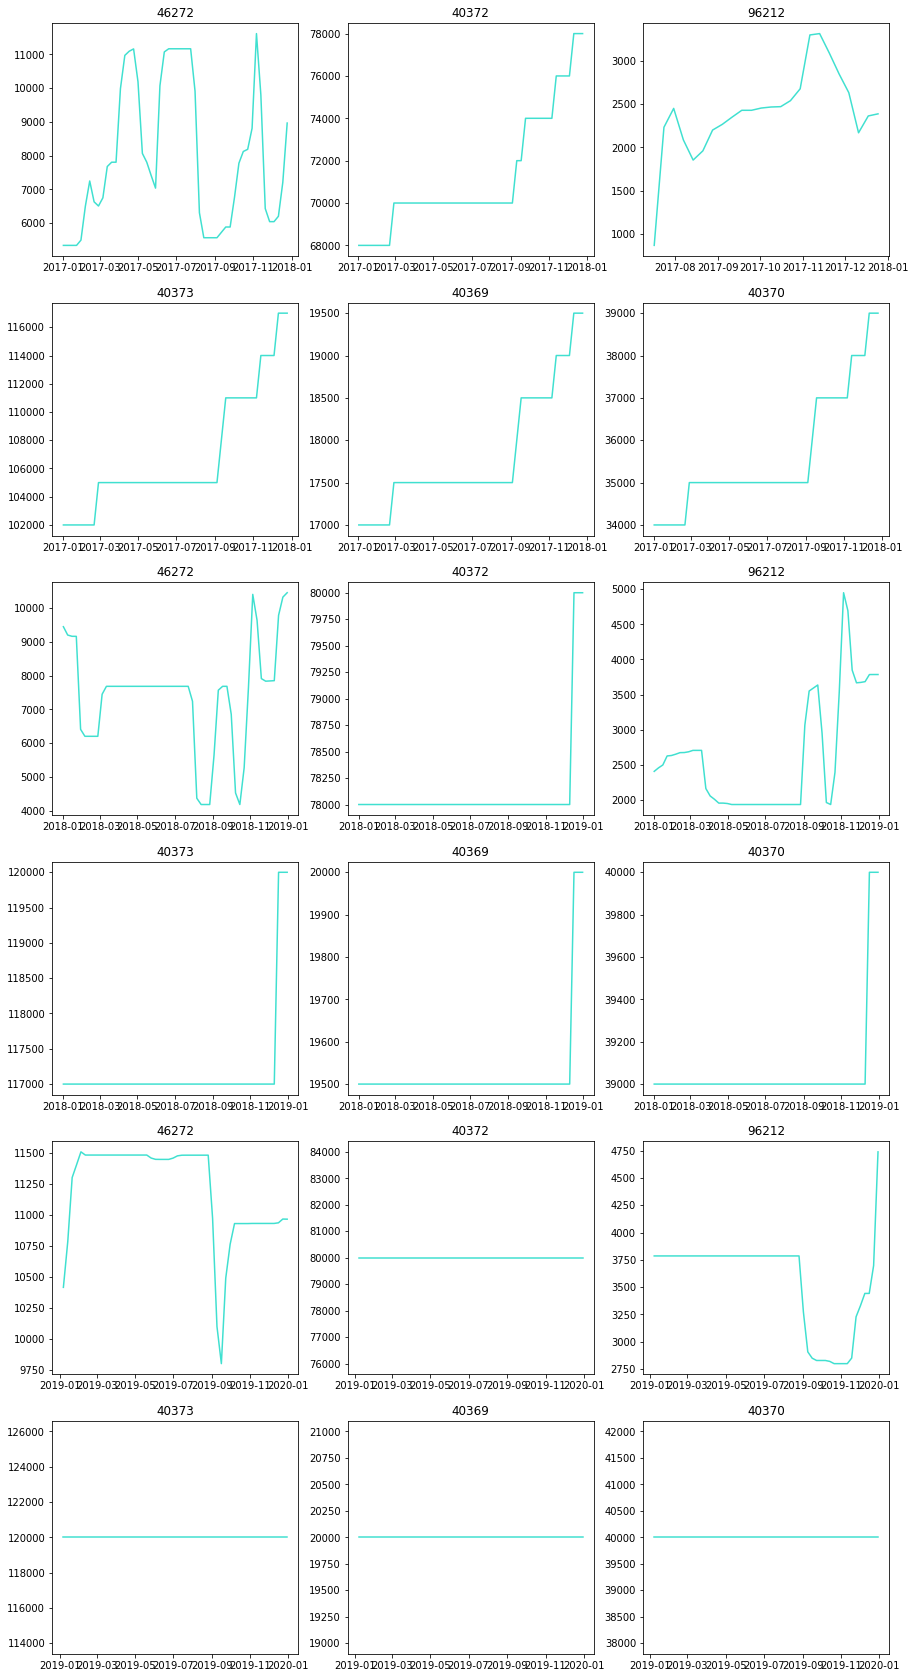

In [362]:
r = 6
c = 3
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0
#'PROMO1_FLAG' 'AUTORIZATION_FLAG'  & (data['period_start_dt'].dt.month == 1) & (data['Month'] == 3)

year = [2017, 2018, 2019]

for yr in range(len(year)):
  for prod in prod_list:
    y= data[(data['product_rk'] == prod) & (data['period_start_dt'].dt.year == year[yr]) ].groupby('period_start_dt', as_index=False)['PRICE_REGULAR'].sum()
    #y = y[y['demand']<1000]
    if (i < r) & (j < c): 
  #   means[prod] = y['demand'].mean()
      ax[i, j].plot(y['period_start_dt'], y['PRICE_REGULAR'], color = 'turquoise')
      ax[i, j].set_title(prod)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
  #   means[prod] = y['demand'].mean()
      ax[i, j].plot(y['period_start_dt'], y['PRICE_REGULAR'], color = 'turquoise')
      ax[i, j].set_title(prod)
      j += 1
    else:
      print('ERROR')  
  yr += 1
  
 
plt.show()

По ценам есть четкая тенденция к значительному росту в конце года, выбросов нет.

Добывим к данным информацию по магазинам:

In [363]:
dcol = ['STORE_OPEN_DTTM', 'STORE_CLOSURE_DTTM']
sdata = pd.read_csv("STORE_LOCATION.csv", delimiter=';',  parse_dates=dcol)
print(sdata.shape)
sdata.head()

(1208, 29)


,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB5_hashing,STORE_LOCATION_ATTRIB6_hashing,STORE_LOCATION_ATTRIB7_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,277,124,124,19,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,691ED43F4AF65A71A6FB21210CBE5109,2356B83B3AE123A290CB245A8F8526DA,75300434BE16A57FD386B22D19B289D5,CB889E260FC7B06777314137C2FB5198,1FAA6C1A11273624AB0AB65A2B4088E8,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,278,124,124,19,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,81C7FB4E26CB45F0745DF4A59EB6CD9E,691ED43F4AF65A71A6FB21210CBE5109,2356B83B3AE123A290CB245A8F8526DA,75300434BE16A57FD386B22D19B289D5,CB889E260FC7B06777314137C2FB5198,1FAA6C1A11273624AB0AB65A2B4088E8,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,279,183,183,20,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,22301E873A3C0BAD5C4C0A912439DB4B,2356B83B3AE123A290CB245A8F8526DA,75300434BE16A57FD386B22D19B289D5,CB889E260FC7B06777314137C2FB5198,89BE5E5DCB4CC7381644A39851FE862B,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,280,211,211,12,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,271329C6DEA8D933600B7F11344D3D42,5987D1803F8B590AF4B65DC273428555,75300434BE16A57FD386B22D19B289D5,B4A0AD777A28164B0EBB338E14AB134A,B21DA7BB444B2B2BD5D26E5E5C06A76B,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
4,281,221,221,3,1,15Mar2018:14:0

Просто добавим к нишим данным записи о магазинах.

In [364]:
a = sdata[ (sdata['STORE_LOCATION_RK'] < 1380 ) ]
b = a[(316 < a['STORE_LOCATION_RK'] )]

In [369]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=b.columns, columns=columns)

for col in b.columns:
  dt.loc[col,"UNIQUE"] = len(b[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(b[col])*100
  dt.loc[col,"NANS"] = np.sum(b[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(b[col])*100
  dt.loc[col,"ZEROS"] = (b[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(b[col])*100
  dt["DATA_TYPE"] = b.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
STORE_LOCATION_RK,1063,100,0,0,0,0,int64
STORE_LOCATION_LVL_RK4,253,23.8006,0,0,0,0,int64
STORE_LOCATION_LVL_RK3,253,23.8006,0,0,0,0,int64
STORE_LOCATION_LVL_RK2,21,1.97554,0,0,0,0,int64
STORE_LOCATION_ATTRIB1_hashing,2,0.188147,0,0,0,0,object
STORE_LOCATION_ATTRIB2_hashing,3,0.28222,0,0,0,0,object
STORE_LOCATION_ATTRIB3_hashing,20,1.88147,0,0,0,0,object
STORE_LOCATION_ATTRIB4_hashing,79,7.4318,0,0,0,0,object
STORE_LOCATION_ATTRIB5_hashing,9,0.84666,0,0,0,0,object
STORE_LOCATION_ATTRIB6_hashing,4,0.376294,0,0,0,0,object


In [366]:
cols = dt[dt['UNIQUE'] == 1].index.tolist()
cols
b = b.drop(cols, axis = 1)

In [370]:
b.columns.tolist()

['STORE_LOCATION_RK',
 'STORE_LOCATION_LVL_RK4',
 'STORE_LOCATION_LVL_RK3',
 'STORE_LOCATION_LVL_RK2',
 'STORE_LOCATION_ATTRIB1_hashing',
 'STORE_LOCATION_ATTRIB2_hashing',
 'STORE_LOCATION_ATTRIB3_hashing',
 'STORE_LOCATION_ATTRIB4_hashing',
 'STORE_LOCATION_ATTRIB5_hashing',
 'STORE_LOCATION_ATTRIB6_hashing',
 'STORE_LOCATION_ATTRIB7_hashing',
 'STORE_LOCATION_ATTRIB8_hashing',
 'STORE_LOCATION_ATTRIB9_hashing',
 'STORE_LOCATION_ATTRIB10_hashing',
 'STORE_LOCATION_ATTRIB11_hashing',
 'STORE_LOCATION_ATTRIB12_hashing',
 'STORE_LOCATION_ATTRIB13_hashing',
 'STORE_LOCATION_ATTRIB14_hashing',
 'STORE_LOCATION_ATTRIB15_hashing',
 'STORE_LOCATION_ATTRIB16_hashing']

In [371]:
columns = ['STORE_LOCATION_LVL_RK4',
 'STORE_LOCATION_LVL_RK3',
 'STORE_LOCATION_LVL_RK2',
 'STORE_LOCATION_ATTRIB1_hashing',
 'STORE_LOCATION_ATTRIB2_hashing',
 'STORE_LOCATION_ATTRIB3_hashing',
 'STORE_LOCATION_ATTRIB4_hashing',
 'STORE_LOCATION_ATTRIB5_hashing',
 'STORE_LOCATION_ATTRIB6_hashing',
 'STORE_LOCATION_ATTRIB7_hashing',
 'STORE_LOCATION_ATTRIB8_hashing',
 'STORE_LOCATION_ATTRIB9_hashing',
 'STORE_LOCATION_ATTRIB10_hashing',
 'STORE_LOCATION_ATTRIB11_hashing',
 'STORE_LOCATION_ATTRIB12_hashing',
 'STORE_LOCATION_ATTRIB13_hashing',
 'STORE_LOCATION_ATTRIB14_hashing',
 'STORE_LOCATION_ATTRIB15_hashing',
 'STORE_LOCATION_ATTRIB16_hashing']

In [376]:
for col in columns:
  data[col] = np.NaN
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB5_hashing,STORE_LOCATION_ATTRIB6_hashing,STORE_LOCATION_ATTRIB7_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing
15,15,40369,317,2016-12-19,50.0,0.0,500.00,500.0,1.0,12,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,40370,317,2016-12-19,44.0,0.0,1000.00,1000.0,1.0,12,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,17,40372,317,2016-12-19,13.0,0.0,2000.00,2000.0,1.0,12,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,40373,317,2016-12-19,6.0,0.0,3000.00,3000.0,1.0,12,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,46272,317,2016-12-19,34.0,0.0,157.00,157.0,1.0,12,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35339,35537,40370,1380,2019-12-30,NaN,0.0,1000.00,1000.0,1.0,12,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35340,35538,40372,1380,2019-12-30,NaN,0.0,2000.00,2000.0,1.0,12,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35341,35539,40373,1380,2019-12-30,NaN,0.0,3000.00,3000.0,1.0,12,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35342,35540,46272,1380,2019-12-30,NaN,1.0,284.29,199.0,1.0,12,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
for i in data.index:
  for col in columns:
    if (type(data.loc[i, col]) != str):
      if (np.isnan(data.loc[i, col])) & (b[b['STORE_LOCATION_RK'] == data.loc[i,'store_location_rk']].shape[0] !=0):
        data.loc[i, col] = b[b['STORE_LOCATION_RK'] == data.loc[i,'store_location_rk']][col].tolist()[0]

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-

In [381]:
data.to_csv("merged_1.csv", index=False, sep=';', decimal=',', encoding='utf-8')

In [417]:
data = pd.read_csv("merged_1.csv", sep=';', decimal=',',  parse_dates=['period_start_dt'])

In [402]:
data.head()

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB5_hashing,STORE_LOCATION_ATTRIB6_hashing,STORE_LOCATION_ATTRIB7_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing
0,15,40369,317,2016-12-19,50.0,0.0,500.0,500.0,1.0,12,3.0,189.0,189.0,10.0,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3
1,16,40370,317,2016-12-19,44.0,0.0,1000.0,1000.0,1.0,12,3.0,189.0,189.0,10.0,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3
2,17,40372,317,2016-12-19,13.0,0.0,2000.0,2000.0,1.0,12,3.0,189.0,189.0,10.0,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3
3,18,40373,317,2016-12-19,6.0,0.0,3000.0,3000.0,1.0,12,3.0,189.0,189.0,10.0,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3
4,19,46272,317,2016-12-19,34.0,0.0,157.0,157.0,1.0,12,3.0,189.0,189.0,10.0,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3


In [420]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35329,100,0,0,0,0,int64
product_rk,6,0.0169832,0,0,0,0,int64
store_location_rk,40,0.113221,0,0,0,0,int64
period_start_dt,159,0.450055,0,0,0,0,datetime64[ns]
demand,1658,4.69303,0,0,1200,3.39664,float64
PROMO1_FLAG,3,0.00849161,28493,80.6505,0,0,float64
PRICE_REGULAR,229,0.648193,0,0,0,0,float64
PRICE_AFTER_DISC,1036,2.93244,0,0,0,0,float64
AUTORIZATION_FLAG,2,0.00566107,3246,9.18792,0,0,float64
Month,12,0.0339664,0,0,0,0,int64


В данных также остались признаки, которые имеют всего одно(не считаю пропуски) значения, а значит они не несут никакой информации, удалим их из выборки.

In [383]:
dt[(dt['NANS'] == 0)].index.tolist()

['id',
 'product_rk',
 'store_location_rk',
 'period_start_dt',
 'PROMO1_FLAG',
 'PRICE_REGULAR',
 'PRICE_AFTER_DISC',
 'AUTORIZATION_FLAG',
 'Month',
 'Week']

In [419]:
cols = dt[(dt['UNIQUE'] == 2) & (dt['NANS'] != 0)].index.tolist()
cols
data = data.drop(cols, axis = 1)

У некоторых наблюений остались пропуски в данных. Посмотрим, по каким магазинам нет данных.

In [394]:
data[data['STORE_LOCATION_ATTRIB3_hashing'].isnull()]['store_location_rk'].unique()

array([1380])

Итого получаем, что у нас нет данных по магазину с индексом 1380. У нас есть только хешированная информация по магазинам, так что непонятно, как можно заполнить пропущенные значения. Заполним их наиболее встречающимися по выборке.

In [412]:
col_s = ['STORE_LOCATION_LVL_RK4',
 'STORE_LOCATION_LVL_RK3',
 'STORE_LOCATION_ATTRIB2_hashing',
 'STORE_LOCATION_ATTRIB3_hashing',
 'STORE_LOCATION_ATTRIB4_hashing',
 'STORE_LOCATION_ATTRIB8_hashing',
 'STORE_LOCATION_ATTRIB9_hashing',
 'STORE_LOCATION_ATTRIB10_hashing',
 'STORE_LOCATION_ATTRIB11_hashing',
 'STORE_LOCATION_ATTRIB12_hashing',
 'STORE_LOCATION_ATTRIB13_hashing',
 'STORE_LOCATION_ATTRIB15_hashing']

In [413]:
mods = {}
for col in col_s:
  mods[col] = data[col].mode().tolist()[0]

mods

{'STORE_LOCATION_ATTRIB10_hashing': '2C3957E2A91B1D2BEE334248B387E402',
 'STORE_LOCATION_ATTRIB11_hashing': '67B1193B31375E3C959BB5246989D0CA',
 'STORE_LOCATION_ATTRIB12_hashing': '67B1193B31375E3C959BB5246989D0CA',
 'STORE_LOCATION_ATTRIB13_hashing': '17AC9AE74D16FBC665FFB4CFC2DF24F5',
 'STORE_LOCATION_ATTRIB15_hashing': 'FC5FD090934CE685C1C12E5E0311F1D4',
 'STORE_LOCATION_ATTRIB2_hashing': '1B208496FEF79DB5BE9F374BF65865E6',
 'STORE_LOCATION_ATTRIB3_hashing': '9B9B954D2D5B0F1C5B0B129DF8DED631',
 'STORE_LOCATION_ATTRIB4_hashing': '04E5A06E3993F6C9A4BFDEF278636ED5',
 'STORE_LOCATION_ATTRIB8_hashing': 'CB5A0648A9D14B22A85E039557A09205',
 'STORE_LOCATION_ATTRIB9_hashing': 'B2581C791DBB8894BFDCFB66B60A17ED',
 'STORE_LOCATION_LVL_RK3': 203.0,
 'STORE_LOCATION_LVL_RK4': 203.0}

In [421]:
for i in data[data['store_location_rk'] == 1380].index:
  for key, value in mods.items():
    data.loc[i, key] = value

data[data['store_location_rk'] == 1380]

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing
35004,35217,40369,1380,2018-12-17,307.463660,0.0,500.00,500.0,0.0,12,3.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
35005,35218,40370,1380,2018-12-17,1.000000,0.0,1000.00,1000.0,0.0,12,3.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
35006,35219,40372,1380,2018-12-17,263.806495,0.0,2000.00,2000.0,0.0,12,3.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
35007,35220,40373,1380,2018-12-17,181.873521,0.0,3000.00,3000.0,0.0,12,3.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
35008,35221,96212,1380,2018-12-17,4.000000,2.0,99.00,49.5,0.0,12,3.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,35537,40370,1380,2019-12-30,NaN,0.0,1000.00,1000.0,1.0,12,5.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
35325,35538,40372,1380,2019-12-30,NaN,0.0,2000.00,2000.0,1.0,12,5.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
35326,35539,40373,1380,2019-12-30,NaN,0.0,3000.00,3000.0,1.0,12,5.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
35327,35540,46272,1380,2019-12-30,NaN,1.0,284.29,199.0,1.0,12,5.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6

Проведем итоговую проверку данных:

In [423]:
columns = ["COUNT", 'MEAN', 'STD', 'MIN', '25%', '50%', '75%', 'MAX']
numeric_data = data.select_dtypes(include=np.number)
dt = pd.DataFrame(index=numeric_data.columns, columns=columns)

for col in numeric_data.columns:
  dt.loc[col,"COUNT"] = numeric_data[numeric_data[col] >= 0][col].count()
  dt.loc[col,"MEAN"] = numeric_data[numeric_data[col] >= 0][col].mean()
  dt.loc[col,"STD"] = numeric_data[numeric_data[col] >= 0][col].std()
  dt.loc[col,"MIN"] = numeric_data[numeric_data[col] >= 0][col].min()
  dt.loc[col,"25%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.25)
  dt.loc[col,"50%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.50)
  dt.loc[col,"75%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.75)
  dt.loc[col,"MAX"] = numeric_data[numeric_data[col] >= 0][col].max()

dt

,COUNT,MEAN,STD,MIN,25%,50%,75%,MAX
id,35329,17774.1,10253.7,15,8893,17778,26651,35541
product_rk,35329,49257,19148.4,40369,40370,40372,46272,96212
store_location_rk,35329,844.467,333.117,317,535,862,1173,1380
demand,34129,54.7952,108.646,0.033333,4,9,25,711
PROMO1_FLAG,35329,0.20544,0.432585,0,0,0,0,2
PRICE_REGULAR,35329,1167.33,1047.24,49,284.29,1000,2000,3000
PRICE_AFTER_DISC,35329,1155.65,1057.98,8.64706,199,1000,2000,3000
AUTORIZATION_FLAG,35329,0.908121,0.288859,0,1,1,1,1
Month,35329,6.70036,3.4945,1,4,7,10,12
Week,35329,2.75026,1.31394,1,2,3,4,5


In [425]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35329,100,0,0,0,0,int64
product_rk,6,0.0169832,0,0,0,0,int64
store_location_rk,40,0.113221,0,0,0,0,int64
period_start_dt,159,0.450055,0,0,0,0,datetime64[ns]
demand,1658,4.69303,0,0,1200,3.39664,float64
PROMO1_FLAG,3,0.00849161,28493,80.6505,0,0,float64
PRICE_REGULAR,229,0.648193,0,0,0,0,float64
PRICE_AFTER_DISC,1036,2.93244,0,0,0,0,float64
AUTORIZATION_FLAG,2,0.00566107,3246,9.18792,0,0,float64
Month,12,0.0339664,0,0,0,0,int64


Посмотрим распределение данных по параметрам магазинов:

In [427]:
object_type_columns = dt[dt['DATA_TYPE'] == 'object'].index.tolist()
object_type_columns

['STORE_LOCATION_ATTRIB2_hashing',
 'STORE_LOCATION_ATTRIB3_hashing',
 'STORE_LOCATION_ATTRIB4_hashing',
 'STORE_LOCATION_ATTRIB8_hashing',
 'STORE_LOCATION_ATTRIB9_hashing',
 'STORE_LOCATION_ATTRIB10_hashing',
 'STORE_LOCATION_ATTRIB11_hashing',
 'STORE_LOCATION_ATTRIB12_hashing',
 'STORE_LOCATION_ATTRIB13_hashing',
 'STORE_LOCATION_ATTRIB15_hashing']

In [428]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cd = pd.DataFrame( data[col_s])

for col in object_type_columns:
  cd[col] = labelencoder.fit_transform(cd[col].astype(str))

cd.tail()

,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing
35324,203.0,203.0,0,7,0,2,0,1,0,0,0,1
35325,203.0,203.0,0,7,0,2,0,1,0,0,0,1
35326,203.0,203.0,0,7,0,2,0,1,0,0,0,1
35327,203.0,203.0,0,7,0,2,0,1,0,0,0,1
35328,203.0,203.0,0,7,0,2,0,1,0,0,0,1


In [429]:
cd.shape

(35329, 12)

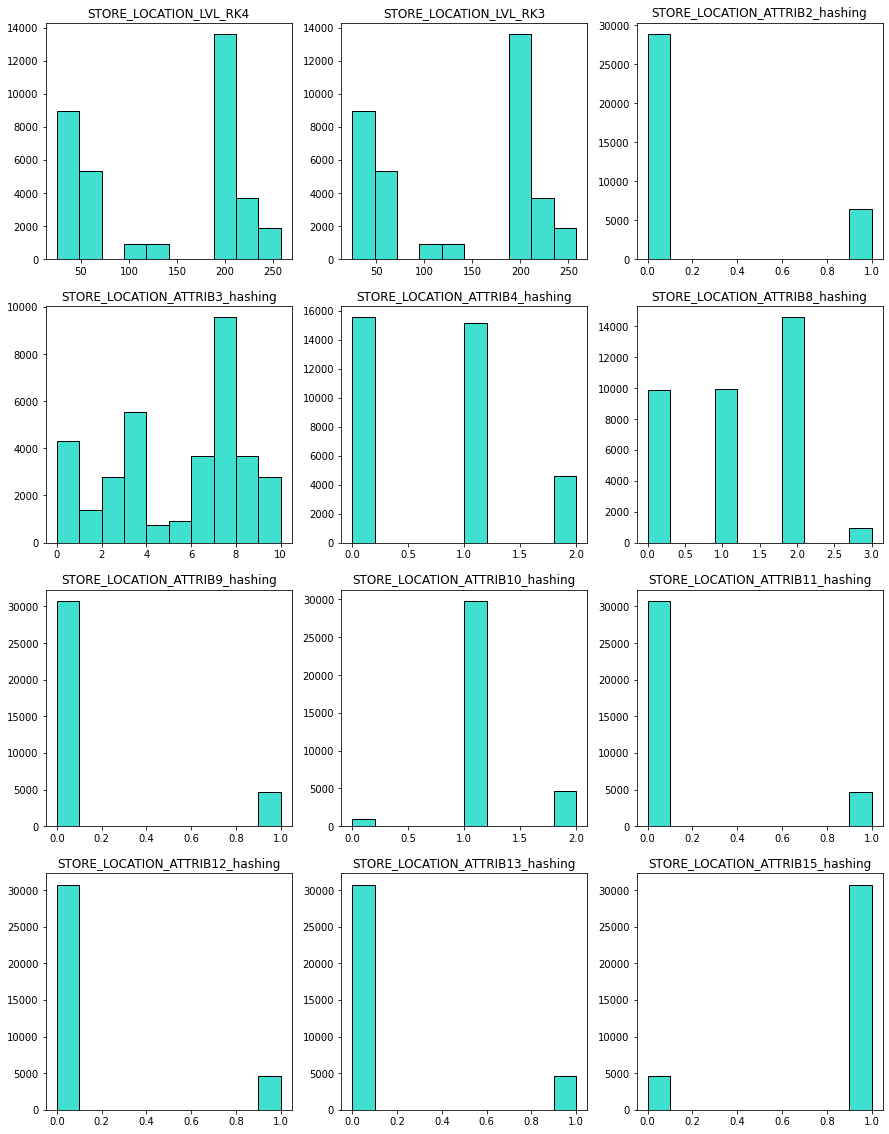

In [431]:
r = 4
c = 3
categorical_data = cd[col_s].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for col in categorical_data.columns:
    if (i < r) & (j < c): 
      ax[i, j].hist(categorical_data[categorical_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      ax[i, j].hist(categorical_data[categorical_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    else:
      print('ERROR')  
 
plt.show()

По признакам магазинов данные распределены неравномерно.

На этом первая часть предобработки данных завершена. Переходим к завершающей стадии предобработки - добавление лаговых фичей.

In [433]:
print(data.shape)
data.head()

(35329, 23)


,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing
0,15,40369,317,2016-12-19,50.0,0.0,500.0,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
1,16,40370,317,2016-12-19,44.0,0.0,1000.0,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
2,17,40372,317,2016-12-19,13.0,0.0,2000.0,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
3,18,40373,317,2016-12-19,6.0,0.0,3000.0,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
4,19,46272,317,2016-12-19,34.0,0.0,157.0,157.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4


In [435]:
data.to_csv("Anna_Trushnikova_BBI172_HW2_p1_1.csv", index=False, sep=';', decimal=',', encoding='utf-8')